# 0. Introduction

We are going to use the data that we have been provided to study and try to predict the evolution of Dengue disease in the cities of **San Juan**, *Puerto Rico*, and **Iquitos**, *Peru*. More information in this [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/).

To begin our study, this notebook will be part of our baseline, where various algorithms with simple optimization will be used, with the aim of beginning to know how we could create robust models.


# 1. Libraries

Before starting any analysis we must ensure that the basic and general use libraries *(numpy, pandas, etc.)* are correctly imported. 

In [ ]:
# Preprocessing
from sklearn import preprocessing

# Loading the data
import pandas as pd
import io
from google.colab import files

# Graphics display
import seaborn as sns
import matplotlib.pyplot as plt

# Estimator and model selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Others
import numpy as np    
from sklearn.metrics import mean_absolute_error 

# 2. Loading the data

The first step is to upload all the CSV files that have been provided to us and that thanks to them we will obtain the data with which we are going to work. To do this, we will use the tools that Google Colab offers us when uploading files.

## Preprocessing the data

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, etc.

In [ ]:
# Make function to preprocess data
def preprocess_data(data_path, labels_path=None):
    # Load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path)
    # Fill missing values
    df.fillna(df.mean(), inplace=True)
    lb = preprocessing.LabelBinarizer()

    if labels_path:
        labels = pd.read_csv(labels_path)
        
        labels['city'] = lb.fit_transform(labels['city'])
    
    df['city'] =  lb.fit_transform(df['city'])

    selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']
    df = df[selected_features]

    if labels_path:
        return df, labels
    return df

We execute the newly compiled method, which will allow us to load and preprocess our data.

In [ ]:
df_features, df_labels = preprocess_data('dengue_features_train.csv', labels_path="dengue_labels_train.csv")

Finally, we also load the file with which we will carry out the final prediction, once our model is trained.

In [ ]:
df_test_final = preprocess_data("dengue_features_test.csv")

# 3. Detaching the dataset

To train the models that we make, it is necessary to separate our training dataset into two parts, one precisely to train the model, and another to check if our models are good.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels['total_cases'], test_size=0.2, random_state=1)

# 4. Execution of the algorithm

This algorithm is a set of Decision Trees, where each tree at the end of its execution will offer a result, at the end of all trees, the result will be the average of all the results.

In [ ]:
def RandomForest(X_train, X_test):
    # Model Parametrization 
    regressor = RandomForestRegressor(n_estimators= 100, max_depth = 5, criterion='mae', random_state=0)
    
    # Model construction
    regressor.fit(X_train, y_train)
    
    # Test
    y_pred = regressor.predict(X_test)

    # Plot
    xx = np.arange(0,len(y_test),1)
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("Random Forests Regressor")

    plt.show()

    mae = mean_absolute_error(y_test,y_pred)
    print("Error Measure ",  mae, "\n")
    
    return regressor

We run the algorithm

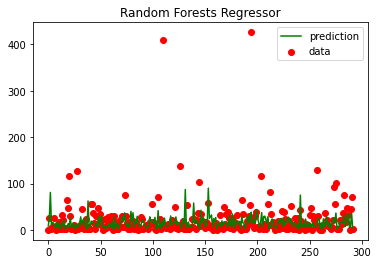

Error Measure  16.8926198630137 



In [ ]:
model = RandomForest(X_train, X_test)

## Submission result

Now, we are going to test our model with the data provided to us in the dengue_features_test.csv file to predict dengue cases for the weeks proposed in said file.



In [ ]:
final_model_prediction = model.predict(df_test_final)

# Round the result and cast to int
y = np.rint(final_model_prediction)
y = y.astype(int)
res = np.hstack(y)

res

array([ 6, 15, 27, 13, 15, 11, 18, 18, 19, 21, 15, 20, 20, 22, 22, 31, 24,
       31, 48, 32, 25, 18, 21, 19, 17, 16, 20, 20, 16, 17, 13, 11, 14, 11,
       14,  9, 14, 17, 13, 18, 15, 16, 14, 13, 14, 14, 15, 12, 12, 17, 13,
        8,  8, 10,  7, 12,  9, 13,  8, 20, 29, 40, 26, 38, 29, 29, 28, 26,
       22, 31, 35, 25, 24, 21, 34, 32, 41, 30, 26, 16, 14, 21, 18, 28, 21,
       31, 17,  9, 20, 13, 31, 21, 16, 14, 31, 10, 24, 20, 19, 28, 29,  9,
       15,  9, 17, 21, 14, 22, 19, 30, 35, 27, 19, 21, 48, 58, 22, 21, 29,
       53, 30, 68, 47, 52, 30, 29, 23, 23, 32, 23, 21, 20, 11, 13, 15, 13,
       17, 20, 14, 13, 14, 16, 16, 17, 15, 15, 15, 16, 14, 14, 16, 15, 14,
       14, 15, 12, 12, 21, 14,  6, 17, 20, 13, 25, 34, 23, 20, 26, 19, 27,
       22, 27, 27, 34, 21, 22, 30, 19, 21, 28, 19, 20, 13, 22, 18, 17, 26,
       21, 13, 17, 15, 13, 16, 16, 16, 18, 18, 16, 15, 18, 15, 13, 13, 13,
       12, 10,  8,  5, 10, 15,  6, 11,  9, 23, 24, 34, 33, 33, 30, 20, 24,
       25, 21, 22, 26, 29

Finally, we are going to download a CSV file that contains our prediction, to load it into DrivenData and return the score of our model.


In [ ]:
submission = pd.read_csv("submission_format.csv", index_col=[0, 1, 2])

submission.total_cases = final_model_prediction.astype(np.int64)
submission.to_csv("result.csv")

**And the result is:**

*27.1659
Woo! I scored 27.1659 on 'DengAI: Predicting Disease Spread'!*